![Control panel at Three Mile Island generating station](controlroomTMI.jpg "The Control Panel")

In [ ]:
%pwd

ipython has "magic" commands, %pwd, %cd, which are intended to make life easier for humans, like showing our directory and letting us change directory.

In [3]:
# Let us first handle the preliminary imports
import pandas as pd
import altair as alt


Note: you can import all of the functions
defined in a module with 
    from pandas import *
This means less typing (good for interactive programming)
but also obscures which code comes from which library.

In [4]:
rainfall = pd.read_csv("cities.csv",delimiter="\t")

In [5]:
head(rainfall)

NameError: name 'head' is not defined

Sorry about that, .head() is a method that belongs to pandas data frames.. I have to call df.head()

In [6]:
rainfall.head()

,Days,"City, State",Inches,Milimeters
0,113,"Atlanta, GA",49.7,1263
1,88,"Austin, TX",34.2,870
2,116,"Baltimore, MD",41.9,1064
3,117,"Birmingham, AL",53.7,1364
4,126,"Boston, MA",43.8,1112


In [7]:
# Let's just quick check what data types this has:
print(rainfall["Days"].dtype)
print(rainfall["City, State"].dtype)
print(rainfall["Inches"].dtype)
print(rainfall["Milimeters"].dtype)

int64
object
float64
int64


In [8]:
# I can add a new column that is easier to type:
rainfall["City"] = rainfall["City, State"]


In [9]:
# basic, altair-defaults bar chart:
alt.Chart(rainfall).mark_bar().encode(alt.X("City:N"), alt.Y("Milimeters:Q"))

alt.Chart(...)

In [10]:
# basic, altair-defaults dot chart:
alt.Chart(rainfall).mark_point().encode(alt.X("City:N"), alt.Y("Milimeters:Q"))

alt.Chart(...)

In [11]:
# basic, altair-defaults line chart:
alt.Chart(rainfall).mark_line().encode(alt.X("City:N"), alt.Y("Milimeters:Q"))

alt.Chart(...)

In [12]:
# We can put the city names in y, where they are easier to read:
alt.Chart(rainfall).mark_bar().encode(alt.Y("City:N"), alt.X("Milimeters:Q"))

alt.Chart(...)

In [13]:
# And we can instruct altair to sort by rainfall in "Milimeters" column:
alt.Chart(rainfall).mark_bar().encode(alt.Y("City:N", sort=alt.Sort(field="Milimeters")), alt.X("Milimeters:Q", sort="ascending"))

alt.Chart(...)

Note, the syntax here (the precise magical incantation to cause the sorting) is *not* at all obvious.  We have to look this up in the altair documentation: 
https://altair-viz.github.io/user_guide/generated/channels/altair.X.html

We can reverse the order by making the "sort" argument to alt.Y a more complex alt.Sort object:

In [14]:
alt.Chart(rainfall).mark_bar().encode(alt.Y("City:N", sort=alt.Sort(field="Milimeters", order="descending")), alt.X("Milimeters:Q"))

alt.Chart(...)

That was altair's default. 

In [15]:
import matplotlib.pyplot as plt


<BarContainer object of 17 artists>

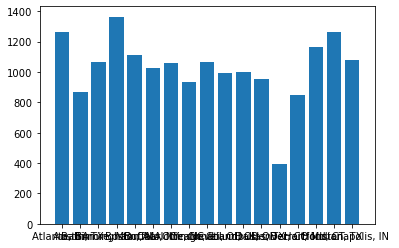

In [16]:
plt.bar(rainfall["City"], rainfall["Milimeters"])

In [17]:
# This is not acceptable.  Perhaps the documentation will help?
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars 

1

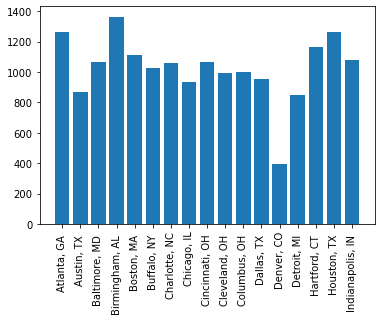

In [18]:
# This doesn't help.  But a quick search reveals the solution:
plt.bar(rainfall["City"], rainfall["Milimeters"])
plt.xticks(rotation=90)
1

1

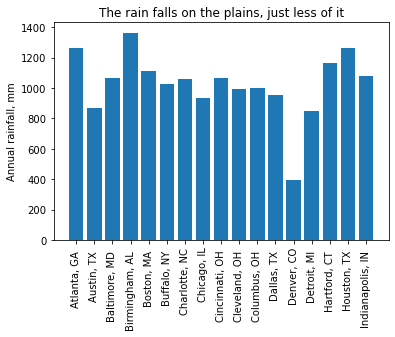

In [19]:
plt.bar(rainfall["City"], rainfall["Milimeters"])
plt.xticks(rotation=90)
plt.ylabel("Annual rainfall, mm")
plt.title("The rain falls on the plains, just less of it")
1

In [20]:
rainfallsorted =rainfall.sort_values(by = "Milimeters")

1

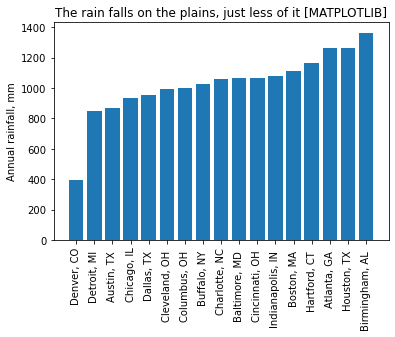

In [21]:
plt.bar(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90)
plt.ylabel("Annual rainfall, mm")
plt.title("The rain falls on the plains, just less of it [MATPLOTLIB]")
1

In [32]:
import plotnine as p9

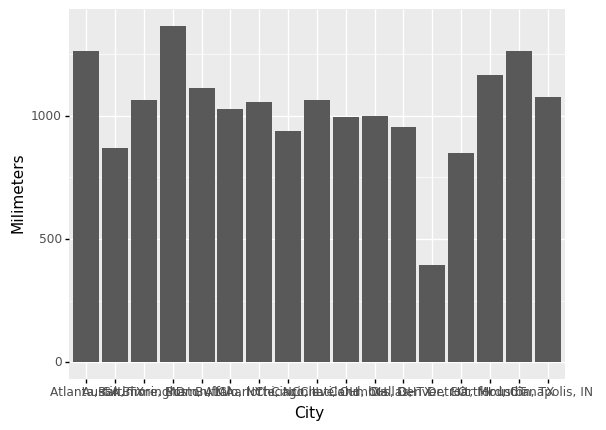

<ggplot: (8773048379670)>

In [48]:
#  p9.ggplot(data=surveys_complete, mapping=p9.aes(x='factor(year)')) + p9.geom_bar()    

p9.ggplot(data=rainfall, mapping=p9.aes(x="City", y="Milimeters")) + p9.geom_bar(stat="identity")

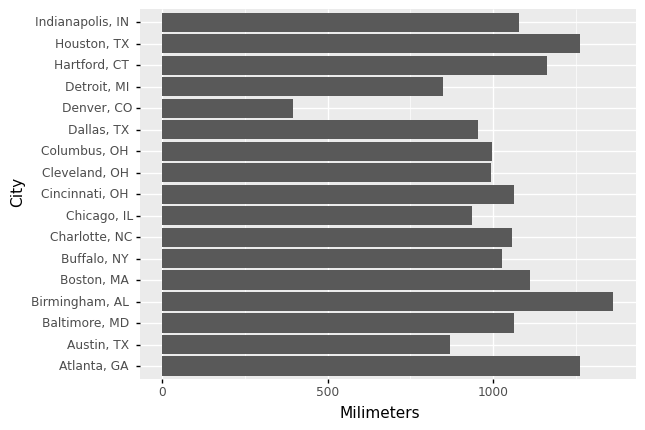

<ggplot: (8773043690873)>

In [53]:
p9.ggplot(data=rainfall, mapping=p9.aes(x="City", y="Milimeters")) + p9.geom_bar(stat="identity")+  p9.coord_flip()

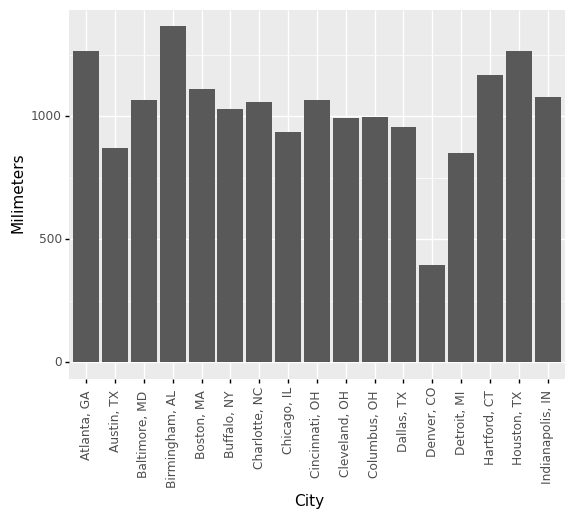

<ggplot: (8773043263886)>

In [64]:
p9.ggplot(data=rainfall, mapping=p9.aes(x="City", y="Milimeters")) + p9.geom_bar(stat="identity") + p9.theme(axis_text_x = p9.element_text(angle = 90))

In [65]:
import seaborn as sns

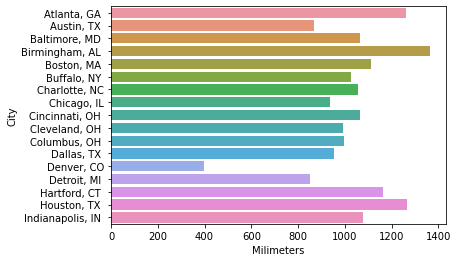

In [68]:
ax = sns.barplot(x="Milimeters", y="City", data=rainfall)

In [ ]:
Oh, my.  Well.  Surely there is a knob somewhere that changes the color scheme?

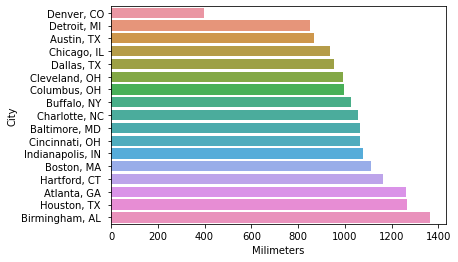

In [69]:
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

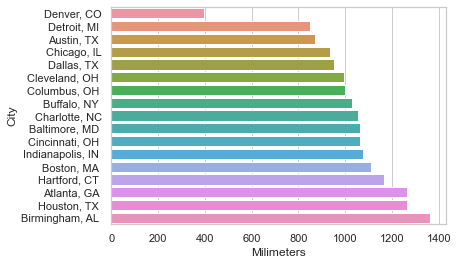

In [70]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

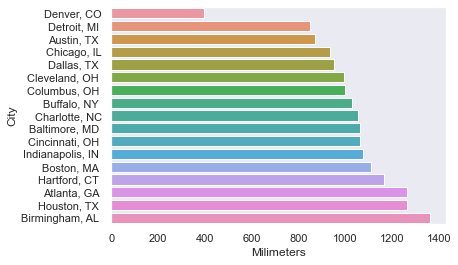

In [74]:
sns.set_style("dark")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

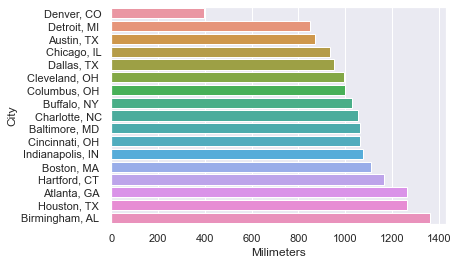

In [75]:
sns.set_style("darkgrid")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

In [ ]:
Ok, set_style is not going to get me out of pastel rainbow decorative bar colors.

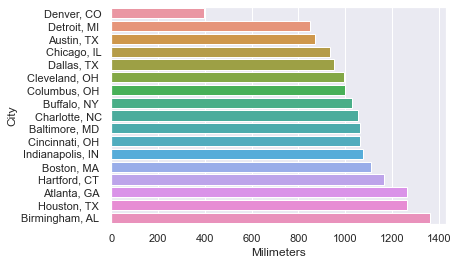

In [161]:
sns.color_palette("rocket")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)


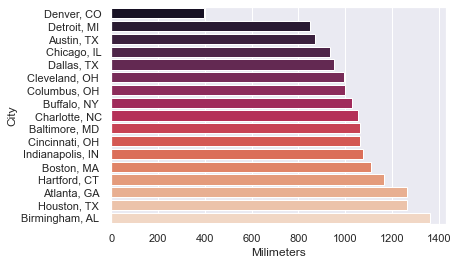

In [163]:
# That didn't do it either.
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted, palette="rocket")


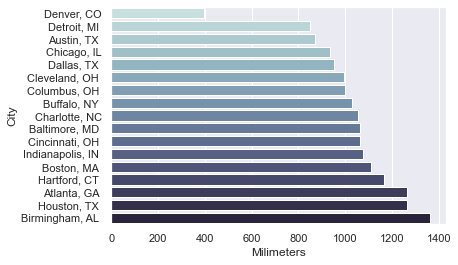

In [164]:
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted, palette="ch:start=.2,rot=-.3")


![City of Chicago](city-of-chicago.jpg "Chicago logo")

In [ ]:
salary=pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

In [84]:
salary.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"118,998.00",NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"97,440.00",NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,"121,272.00",NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"119,712.00",NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9


In [86]:
salary.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary         object
Hourly Rate          float64
dtype: object

In [88]:
salary[salary["Salary or Hourly"] == "Salary"]


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"118,998.00",NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"97,440.00",NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,"121,272.00",NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"119,712.00",NaN
5,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,"72,510.00",NaN
...,...,...,...,...,...,...,...,...
31054,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,"76,266.00",NaN
31055,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,"80,016.00",NaN
31056,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,"90,024.00",NaN
31057,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,"93,354.00",NaN


In [89]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [92]:
print(len(salaried))
print(len(hourly))

24432
6627


In [93]:
len(salary)

31059

(array([16776.,  3229.,  1901.,  1022.,   531.,   398.,   221.,   145.,
          114.,    95.]),
 array([  0. ,  88.1, 176.2, 264.3, 352.4, 440.5, 528.6, 616.7, 704.8,
        792.9, 881. ]),
 <BarContainer object of 10 artists>)

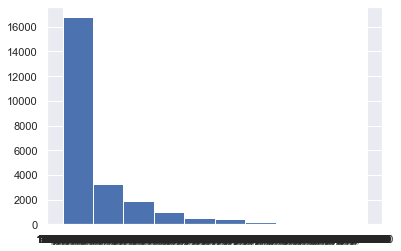

In [95]:
plt.hist(salaried["Annual Salary"])

In [99]:
salary["Annual Salary fix"] = pd.to_numeric(salary["Annual Salary"].str.replace(",", ""))

In [100]:
salary["Annual Salary fix"].dtype

dtype('float64')

(array([2.8600e+02, 2.6970e+03, 1.3014e+04, 6.2070e+03, 1.7930e+03,
        3.6700e+02, 6.4000e+01, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 21600. ,  46940.4,  72280.8,  97621.2, 122961.6, 148302. ,
        173642.4, 198982.8, 224323.2, 249663.6, 275004. ]),
 <BarContainer object of 10 artists>)

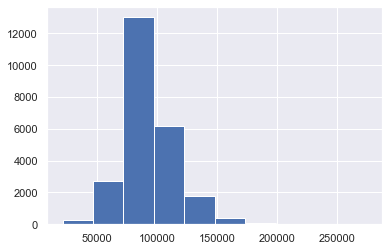

In [101]:
plt.hist(salary["Annual Salary fix"])

(array([2.000e+00, 1.200e+02, 1.640e+02, 6.520e+02, 1.086e+03, 9.590e+02,
        4.026e+03, 3.731e+03, 5.257e+03, 3.186e+03, 1.345e+03, 1.676e+03,
        1.004e+03, 4.850e+02, 3.040e+02, 1.880e+02, 8.200e+01, 9.700e+01,
        2.500e+01, 2.300e+01, 1.600e+01, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 21600. ,  30046.8,  38493.6,  46940.4,  55387.2,  63834. ,
         72280.8,  80727.6,  89174.4,  97621.2, 106068. , 114514.8,
        122961.6, 131408.4, 139855.2, 148302. , 156748.8, 165195.6,
        173642.4, 182089.2, 190536. , 198982.8, 207429.6, 215876.4,
        224323.2, 232770. , 241216.8, 249663.6, 258110.4, 266557.2,
        275004. ]),
 <BarContainer object of 30 artists>)

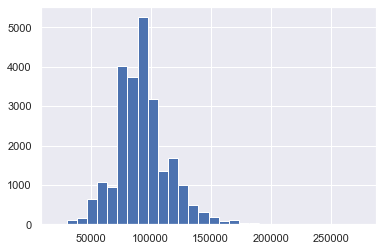

In [102]:
plt.hist(salary["Annual Salary fix"], bins=30)

Text(0.5, 0, 'Annual salary, $')

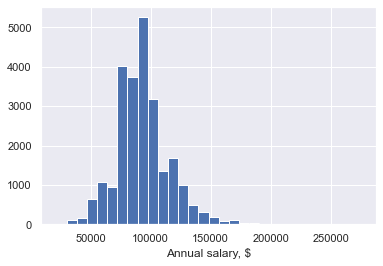

In [103]:
plt.hist(salary["Annual Salary fix"], bins=30)
plt.xlabel("Annual salary, $")

In [104]:
a = pd.to_numeric(salary["Hourly Rate"].str.replace(",", ""))
a.head()

AttributeError: Can only use .str accessor with string values!

In [126]:
import altair as alt
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=True), y="count()")

alt.Chart(...)

In [111]:
salary[0:1000]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Annual Salary fix
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"118,998.00",NaN,118998.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"97,440.00",NaN,97440.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,"121,272.00",NaN,121272.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"119,712.00",NaN,119712.0
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.90,NaN
...,...,...,...,...,...,...,...,...,...
995,"AROCHO, ALBERTO",MOTOR TRUCK DRIVER,AVIATION,F,Hourly,40.0,NaN,39.25,NaN
996,"ARREDIA, GARY J",CONSTRUCTION LABORER,WATER MGMNT,F,Hourly,40.0,NaN,45.90,NaN
997,"ARREDONDO, GABRIEL",OPERATING ENGINEER-GROUP A,DAIS,F,Hourly,40.0,NaN,52.45,NaN
998,"ARREDONDO, JAVIER",FIRE ENGINEER,FIRE,F,Salary,NaN,"111,474.00",NaN,111474.0


In [120]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [121]:
alt.Chart(salaried[0:10]).mark_bar().encode(alt.X("Annual Salary:Q", bin=True), alt.Y("count()"))

alt.Chart(...)

In [125]:
salaried["Annual Salary fix"]

0        118998.0
1         97440.0
2        121272.0
3        119712.0
5         72510.0
           ...   
31054     76266.0
31055     80016.0
31056     90024.0
31057     93354.0
31058    139392.0
Name: Annual Salary fix, Length: 24432, dtype: float64

In [128]:
salary["Department"].value_counts()

POLICE                 12822
FIRE                    4785
STREETS & SAN           1874
WATER MGMNT             1830
AVIATION                1468
TRANSPORTN              1203
DAIS                     975
PUBLIC LIBRARY           965
OEMC                     955
FAMILY & SUPPORT         606
HEALTH                   517
FINANCE                  474
CITY COUNCIL             407
LAW                      351
PUBLIC SAFETY ADMIN      271
BUILDINGS                239
BUSINESS AFFAIRS         171
HOUSING & ECON DEV       150
COPA                     120
MAYOR'S OFFICE           106
BOARD OF ELECTION        102
INSPECTOR GEN             93
CITY CLERK                85
PROCUREMENT               78
HOUSING                   70
HUMAN RESOURCES           68
CULTURAL AFFAIRS          61
ANIMAL CONTRL             61
BUDGET & MGMT             39
ADMIN HEARNG              34
TREASURER                 28
DISABILITIES              26
HUMAN RELATIONS           15
BOARD OF ETHICS            7
POLICE BOARD  

In [129]:
import altair as alt
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=True), y="count()", color="Department")

alt.Chart(...)

In [130]:
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=alt.Bin(maxbins=30)), y="count()", color="Department")

alt.Chart(...)

In [148]:
topdepts = salary["Department"].value_counts()[0:9]

In [132]:
topdepts


POLICE                 12822
FIRE                    4785
STREETS & SAN           1874
WATER MGMNT             1830
AVIATION                1468
TRANSPORTN              1203
DAIS                     975
PUBLIC LIBRARY           965
OEMC                     955
FAMILY & SUPPORT         606
HEALTH                   517
FINANCE                  474
CITY COUNCIL             407
LAW                      351
PUBLIC SAFETY ADMIN      271
Name: Department, dtype: int64

In [149]:
topdepts.index

Index(['POLICE', 'FIRE', 'STREETS & SAN', 'WATER MGMNT', 'AVIATION',
       'TRANSPORTN', 'DAIS', 'PUBLIC LIBRARY', 'OEMC'],
      dtype='object')

In [150]:
deptwhitelist = set (topdepts.index)

In [152]:
"DAIS" in deptwhitelist


True

In [153]:
"HOGWARTS" in deptwhitelist

False

In [154]:
"BOARD OF ETHICS" in deptwhitelist

False

In [155]:
salary["Department_clean"] = salary["Department"]

In [156]:
for i in salary.index:
    if i < 10:
        print(salary.Department_clean[i])
    if salary.Department_clean[i] not in deptwhitelist:
        salary.Department_clean[i] = "OTHER"


POLICE
POLICE
DAIS
WATER MGMNT
TRANSPORTN
POLICE
OEMC
AVIATION
FIRE
POLICE


<ipython-input-156-fa85d9efd537>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [157]:
salary.Department.value_counts()

POLICE                 12822
FIRE                    4785
STREETS & SAN           1874
WATER MGMNT             1830
AVIATION                1468
TRANSPORTN              1203
DAIS                     975
PUBLIC LIBRARY           965
OEMC                     955
FAMILY & SUPPORT         606
HEALTH                   517
FINANCE                  474
CITY COUNCIL             407
LAW                      351
PUBLIC SAFETY ADMIN      271
BUILDINGS                239
BUSINESS AFFAIRS         171
HOUSING & ECON DEV       150
COPA                     120
MAYOR'S OFFICE           106
BOARD OF ELECTION        102
INSPECTOR GEN             93
CITY CLERK                85
PROCUREMENT               78
HOUSING                   70
HUMAN RESOURCES           68
CULTURAL AFFAIRS          61
ANIMAL CONTRL             61
BUDGET & MGMT             39
ADMIN HEARNG              34
TREASURER                 28
DISABILITIES              26
HUMAN RELATIONS           15
BOARD OF ETHICS            7
POLICE BOARD  

In [158]:
salary.Department_clean.value_counts()

POLICE            12822
FIRE               4785
OTHER              4182
STREETS & SAN      1874
WATER MGMNT        1830
AVIATION           1468
TRANSPORTN         1203
DAIS                975
PUBLIC LIBRARY      965
OEMC                955
Name: Department_clean, dtype: int64

In [168]:
alt.Chart(salary[0:5000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=alt.Bin(maxbins=30)), y="count()", color="Department_clean")

alt.Chart(...)